# Introducing Scikit-Learn

Scikit-Learn is characterized by a clean, uniform, and streamlined API, as well as by very useful and complete online documentation. A benefit of this uniformity is that once you understand the basic use and syntax of Scikit-Learn for one type of model, switching to a new model or algorithm is very straightforward.

## Data Representation in Scikit-Learn

### Data as table

For example, consider the Iris dataset, famously analyzed by Ronald Fisher in 1936. We can download this dataset in the form of a Pandas DataFrame using the seaborn library

In [1]:
import seaborn as sns
iris = sns.load_dataset('iris')
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


* Refer to the rows of the matrix as samples, and the number of rows as n_samples
* Refer to the columns of the matrix as features, and the number of columns as n_features

#### Features Matrix

* The samples (i.e., rows) always refer to the individual objects described by the dataset. For example, the sample might be a flower, a person, a document, an image, a sound file, a video, an astronomical object, or anything else you can describe with a set of quantitative measurements.
* The features (i.e., columns) always refer to the distinct observations that describe each sample in a quantitative manner. Features are generally real-valued, but may be Boolean or discrete-valued in some cases.

#### Target array

The distinguishing feature of the target array is that it is usually the quantity we want to predict from the data: in statistical terms, it is the dependent variable. For example, in the preceding data we may wish to construct a model that can predict the species of flower based on the other measurements; in this case, the species column would be considered the target array

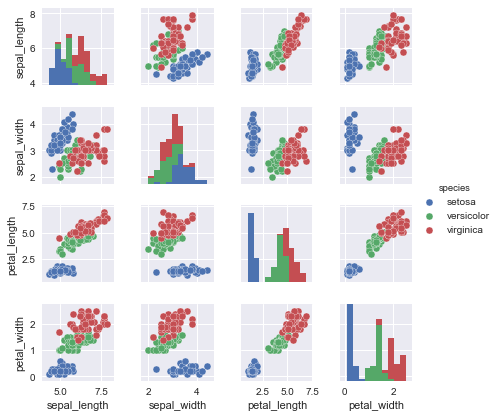

In [2]:
%matplotlib inline
import seaborn as sns; sns.set()
sns.pairplot(iris, hue='species', size=1.5);

Here target array are the species class and features matrix the rest of data

In [3]:
# drop species target array for features matrix
X_iris = iris.drop('species', axis=1)
X_iris.shape

(150, 4)

In [5]:
# target Array
y_iris = iris['species']
y_iris.shape

(150,)

## Scikit-Learn's Estimator API

* Consistency: All objects share a common interface drawn from a limited set of methods, with consistent documentation.
* Inspection: All specified parameter values are exposed as public attributes.
* Limited object hierarchy: Only algorithms are represented by Python classes; datasets are represented in standard formats (NumPy arrays, Pandas DataFrames, SciPy sparse matrices) and parameter names use standard Python strings.
* Composition: Many machine learning tasks can be expressed as sequences of more fundamental algorithms, and Scikit-Learn makes use of this wherever possible.
* Sensible defaults: When models require user-specified parameters, the library defines an appropriate default value.


### Basics of the API

Steps in using the Scikit-Learn estimator API are as follows (we will step through a handful of detailed examples in the sections that follow).

1. Choose a class of model by importing the appropriate estimator class from Scikit-Learn.
2. Choose model hyperparameters by instantiating this class with desired values.
3. Arrange data into a features matrix and target vector following the discussion above.
4. Fit the model to your data by calling the fit() method of the model instance.
5. Apply the Model to new data:
    - For supervised learning, often we predict labels for unknown data using the predict() method.
    - For unsupervised learning, we often transform or infer properties of the data using the transform() or predict() method.


### Supervised learning example: Simple linear regression

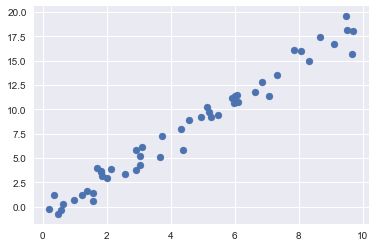

In [7]:
import matplotlib.pyplot as plt
import numpy as np

rng = np.random.RandomState(42)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y);

#### 1. Choose a class of model

In [8]:
from sklearn.linear_model import LinearRegression

#### 2. Choose model hyperparameters

In Scikit-Learn, hyperparameters are chosen by passing values at model instantiation.

In [9]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

When the model is instantiated, the only action is the storing of these hyperparameter values. In particular, we have not yet applied the model to any data:

#### 3. Arrange data into a features matrix and target vector

In [11]:
# change shape like an matrix
X = x[:, np.newaxis]
X.shape

(50, 1)

#### 4. Fit the model to your data

In [12]:
model.fit(X, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

This fit() command causes a number of model-dependent internal computations to take place, and the results of these computations are stored in model-specific attributes that the user can explore.

In [13]:
model.coef_

array([1.9776566])

In [14]:
model.intercept_

-0.9033107255311146

#### 5. Predict labels for unknown data

Once the model is trained, the main task of supervised machine learning is to evaluate it based on what it says about new data that was not part of the training set.

In [15]:
xfit = np.linspace(-1, 11)

In [20]:
# reshape and predict
Xfit = xfit[:, np.newaxis]
yfit = model.predict(Xfit)

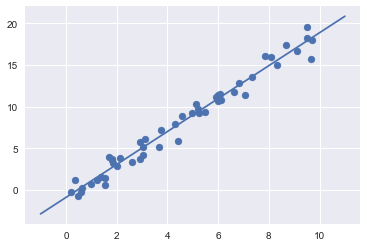

In [22]:
plt.scatter(x, y)
plt.plot(xfit, yfit);

### Supervised learning example: Iris classification

Our question will be this: given a model trained on a portion of the Iris data, how well can we predict the remaining labels?

In [24]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, ytrain, ytest = train_test_split(X_iris, y_iris,
                                                random_state=1)

In [25]:
from sklearn.naive_bayes import GaussianNB # 1. choose model class
model = GaussianNB()                       # 2. instantiate model
model.fit(Xtrain, ytrain)                  # 3. fit model to data
y_model = model.predict(Xtest)             # 4. predict on new data

In [26]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.9736842105263158

With an accuracy topping 97%, we see that even this very naive classification algorithm is effective for this particular dataset!

### Unsupervised learning example: Iris dimensionality

The task of dimensionality reduction is to ask whether there is a suitable lower-dimensional representation that retains the essential features of the data. Often dimensionality reduction is used as an aid to visualizing data: after all, it is much easier to plot data in two dimensions than in four dimensions or higher!

Here we will use principal component analysis (PCA; see In Depth: Principal Component Analysis), which is a fast linear dimensionality reduction technique.

In [27]:
from sklearn.decomposition import PCA  # 1. Choose the model class
model = PCA(n_components=2)            # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                      # 3. Fit to data. Notice y is not specified!
X_2D = model.transform(X_iris)         # 4. Transform the data to two dimensions

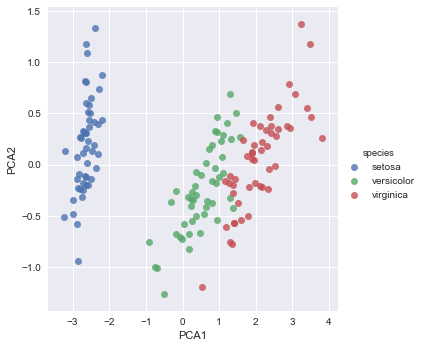

In [28]:
# let's plot result
iris['PCA1'] = X_2D[:, 0]
iris['PCA2'] = X_2D[:, 1]
sns.lmplot("PCA1", "PCA2", hue='species', data=iris, fit_reg=False);

### Unsupervised learning: Iris clustering

Let's next look at applying clustering to the Iris data. A clustering algorithm attempts to find distinct groups of data without reference to any labels. Here we will use a powerful clustering method called a Gaussian mixture model (GMM), discussed in more detail in In Depth: Gaussian Mixture Models. 

In [30]:
from sklearn.mixture import GaussianMixture # 1. Choose the model class
model = GaussianMixture(n_components=3,
            covariance_type='full')         # 2. Instantiate the model with hyperparameters
model.fit(X_iris)                           # 3. Fit to data. Notice y is not specified!
y_gmm = model.predict(X_iris)               # 4. Determine cluster labels

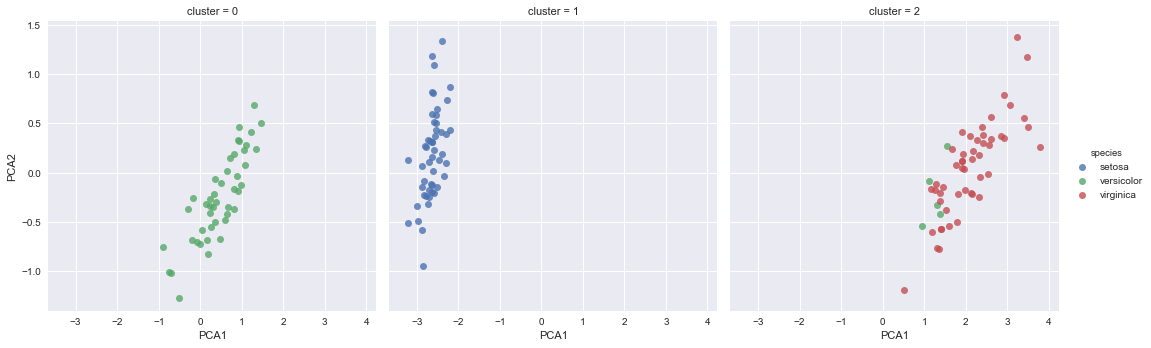

In [31]:
iris['cluster'] = y_gmm
sns.lmplot("PCA1", "PCA2", data=iris, hue='species',
           col='cluster', fit_reg=False);

By splitting the data by cluster number, we see exactly how well the GMM algorithm has recovered the underlying label: the setosa species is separated perfectly within cluster 0, while there remains a small amount of mixing between versicolor and virginica. 

## Application: Exploring Hand-written Digits

### Loading and visualizing the digits data

In [32]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.images.shape

(1797, 8, 8)

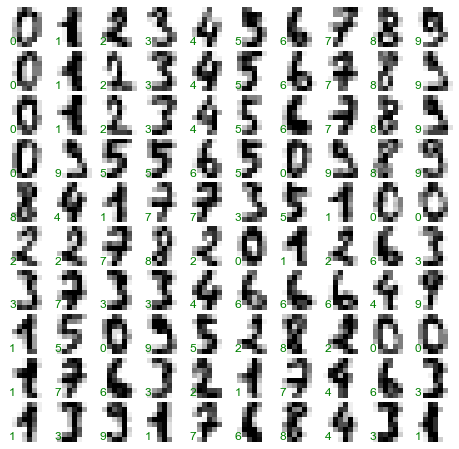

In [33]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

for i, ax in enumerate(axes.flat):
    ax.imshow(digits.images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(digits.target[i]),
            transform=ax.transAxes, color='green')

In [34]:
X = digits.data
X.shape

(1797, 64)

In [35]:
y = digits.target
y.shape

(1797,)

### Unsupervised learning: Dimensionality reduction

In [36]:
from sklearn.manifold import Isomap
iso = Isomap(n_components=2)
iso.fit(digits.data)
data_projected = iso.transform(digits.data)
data_projected.shape

(1797, 2)

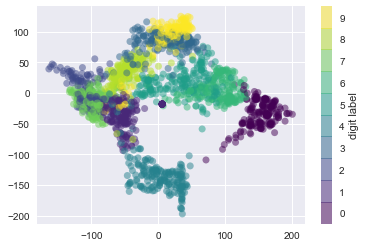

In [38]:
plt.scatter(data_projected[:, 0], data_projected[:, 1], c=digits.target,
            edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('viridis', 10))
plt.colorbar(label='digit label', ticks=range(10))
plt.clim(-0.5, 9.5);

### Classification on digits

In [39]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, random_state=0)

In [40]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(Xtrain, ytrain)
y_model = model.predict(Xtest)

In [41]:
from sklearn.metrics import accuracy_score
accuracy_score(ytest, y_model)

0.8333333333333334

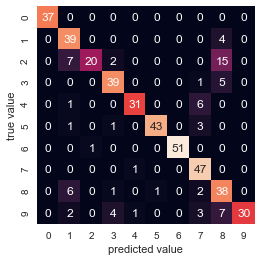

In [42]:
# show error
from sklearn.metrics import confusion_matrix

mat = confusion_matrix(ytest, y_model)

sns.heatmap(mat, square=True, annot=True, cbar=False)
plt.xlabel('predicted value')
plt.ylabel('true value');

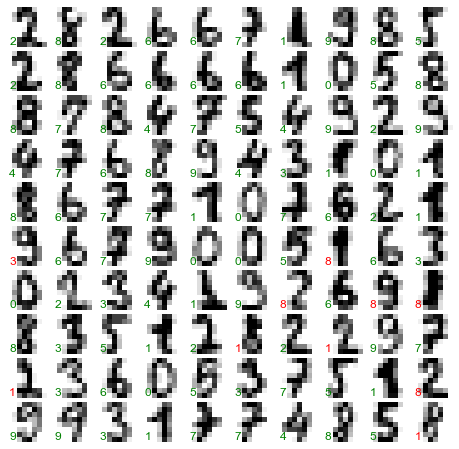

In [43]:
fig, axes = plt.subplots(10, 10, figsize=(8, 8),
                         subplot_kw={'xticks':[], 'yticks':[]},
                         gridspec_kw=dict(hspace=0.1, wspace=0.1))

test_images = Xtest.reshape(-1, 8, 8)

for i, ax in enumerate(axes.flat):
    ax.imshow(test_images[i], cmap='binary', interpolation='nearest')
    ax.text(0.05, 0.05, str(y_model[i]),
            transform=ax.transAxes,
            color='green' if (ytest[i] == y_model[i]) else 'red')

We might move to a more sophisticated algorithm such as support vector machines (see In-Depth: Support Vector Machines), random forests (see In-Depth: Decision Trees and Random Forests) or another classification approach.